In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('urls_local_authorities_filtered_bykeywords.csv') #Remember to add csv to colab and add csv name here
df.head()

,Unnamed: 0,url,parent_url,postcodes,cc_url,content,V1.x,name.x,V1.y,name.y
0,1,https://meetings.westoxon.gov.uk/ieDecisionDet...,meetings.westoxon.gov.uk,[],https://data.commoncrawl.org/crawl-data/CC-MAI...,west oxfordshire district council - decision -...,1533,West Oxfordshire District Council,1533,West Oxfordshire District Council
1,2,https://meetings.westoxon.gov.uk/mgCalendarPri...,meetings.westoxon.gov.uk,"['OX18 1AX', 'OX28 1NB']",https://data.commoncrawl.org/crawl-data/CC-MAI...,calendar printer friendly view - march 2023\r\...,1533,West Oxfordshire District Council,1533,West Oxfordshire District Council
2,3,https://consultations.leicester.gov.uk/sec/art...,consultations.leicester.gov.uk,[],https://data.commoncrawl.org/crawl-data/CC-MAI...,article 4 direction extension - leicester city...,414,Leicester City Council,414,Leicester City Council
3,4,https://consultations.leicester.gov.uk/cookie_...,consultations.leicester.gov.uk,[],https://data.commoncrawl.org/crawl-data/CC-MAI...,cookies - leicester city council - citizen spa...,414,Leicester City Council,414,Leicester City Council
4,5,https://meetings.westoxon.gov.uk/mgCalendarEve...,meetings.westoxon.gov.uk,[],https://data.commoncrawl.org/crawl-data/CC-MAI...,west oxfordshire district council - calendar e...,1533,West Oxfordshire District Council,1533,West Oxfordshire District Council


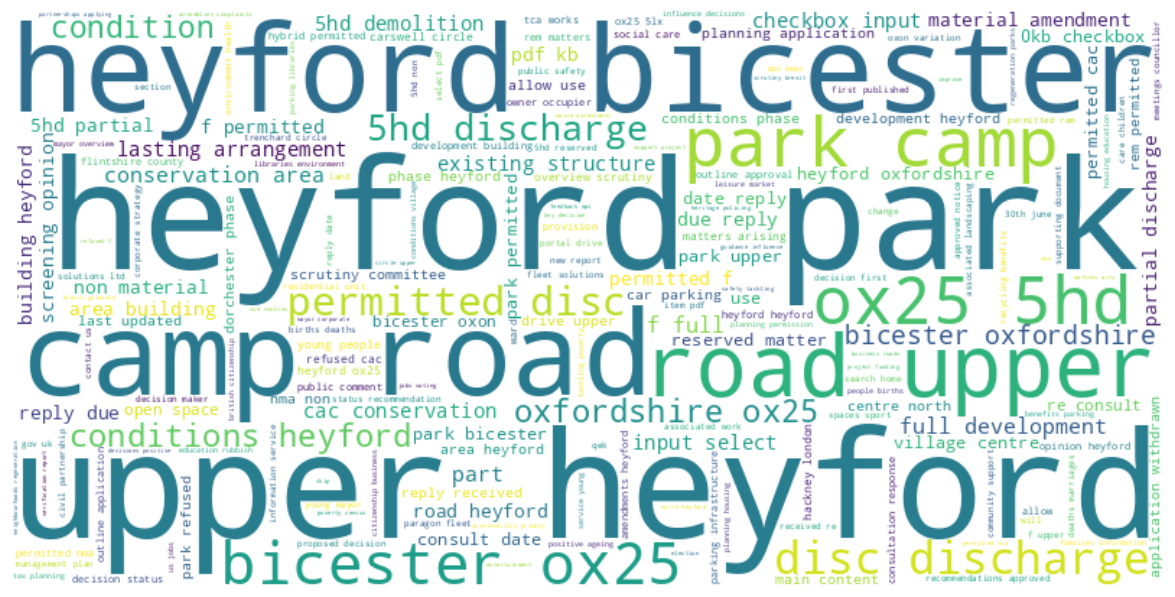

In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv('urls_local_authorities_filtered_bykeywords.csv')

# Combine all content into one large string
text = " ".join(str(content) for content in df['content'].dropna())

# Optional: add common words to ignore
stopwords = set(STOPWORDS)
stopwords.update(["local", "authority", "council"])  # customize as needed

# Create the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords,
    max_words=200
).generate(text)

# Display
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


# Combine content if needed (or just use it directly)
texts = df['content'].fillna('')  # fill NaN with empty strings

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(
    max_df=0.8,      # ignore very common words
    min_df=2,        # ignore very rare words
    stop_words='english'
)
X = vectorizer.fit_transform(texts)

# Perform KMeans clustering
num_clusters = 5  # adjust based on how many clusters you want
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Add cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

# Show a sample of each cluster
for i in range(num_clusters):
    print(f"\nCluster {i} sample:")
    print(df[df['cluster'] == i][['content']].head(3))

# Optional: save the clustered data to a new CSV
df.to_csv('urls_clustered.csv', index=False)



Cluster 0 sample:
                                                content
1875  planning application: 97/00944/f - planning re...
1877  planning application: 12/01710/f - planning re...
1882  planning application: 14/00353/disc - planning...

Cluster 1 sample:
                                             content
0  west oxfordshire district council - decision -...
1  calendar printer friendly view - march 2023\r\...
2  article 4 direction extension - leicester city...

Cluster 2 sample:
                                              content
33  west oxfordshire district council - agenda for...
39  west oxfordshire district council - agenda ite...
46  west oxfordshire district council - agenda for...

Cluster 3 sample:
                                              content
6   west oxfordshire district council - attendance...
15  west oxfordshire district council - attendance...
18  west oxfordshire district council - attendance...

Cluster 4 sample:
                                     

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


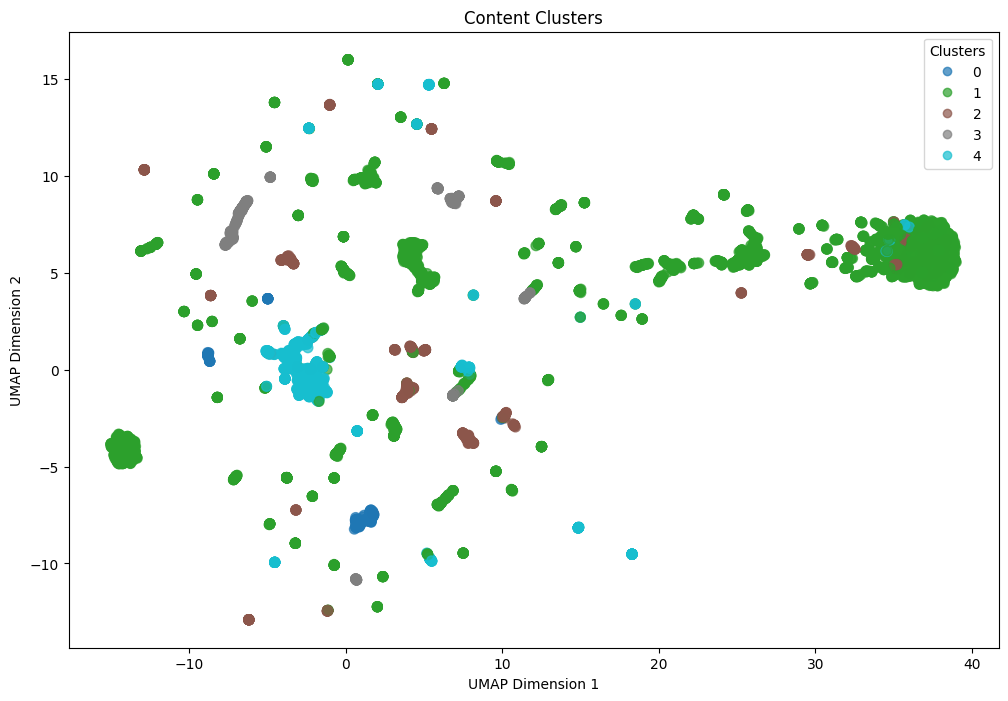

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import umap
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv('urls_clustered.csv')

# Prepare text
texts = df['content'].fillna('')

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english')
X = vectorizer.fit_transform(texts)

# KMeans clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Reduce dimensionality to 2D for plotting
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_2d = reducer.fit_transform(X.toarray())

# Plot clusters
plt.figure(figsize=(12,8))
scatter = plt.scatter(X_2d[:,0], X_2d[:,1], c=df['cluster'], cmap='tab10', s=50, alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title("Content Clusters")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()
